In [1]:
import numpy as np
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import PandasTools
import zipfile
from io import BytesIO



c:\Users\lisa0\anaconda3\envs\LG_newmoses\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# SMILES to molecular structure

In [2]:
#smiles = pd.read_csv('../checkpoints/ZINC_vae_done/vae_generated.csv')
smiles = pd.read_csv('../../NewMoses_results/ZINC_vae_20240515/vae_generated.csv')
smiles.head()

SMILES
0     O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1
1            CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1
2        CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1
3  O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2
4    Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F

In [7]:
smiles['ROMol'] = smiles['SMILES'].apply(Chem.MolFromSmiles)

[15:26:25] Can't kekulize mol.  Unkekulized atoms: 16 17 18
[15:26:25] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 16 17 18
[15:26:25] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 7
[15:26:25] SMILES Parse Error: unclosed ring for input: 'Cc1cc(C(=O)N2CC3CC(C(=O)NC4CC4C5C3)C(=O)N3C2CCC2)no1'
[15:26:25] SMILES Parse Error: unclosed ring for input: 'N#Cc1cccc(-c2cn3c(n2)N(C(=O)C2CCC2)CC(O)C2)c1'
[15:26:25] Can't kekulize mol.  Unkekulized atoms: 3 4 6 9 18
[15:26:25] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17
[15:26:25] SMILES Parse Error: unclosed ring for input: 'CC1CN(Cc2nc3sc4c(c3c(=O)n(C)c(=O)n3C)CCCC2)cs1'
[15:26:25] SMILES Parse Error: unclosed ring for input: 'COc1cccc(C(=O)N2CCC(O)(C3(C)C)CC2)c1F'
[15:26:25] SMILES Parse Error: extra close parentheses while parsing: CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1
[15:26:25] SMILES Parse Error: Failed parsing SMILES 'CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1' for input: 'CN(CCc1ccccn1)C(=O)CC#N)c1ccncc1'
[15:26:25] SMILES Parse Err

In [8]:
smiles.head()

SMILES  \
0     O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1   
1            CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1   
2        CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1   
3  O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2   
4    Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F   

                                               ROMol  
0  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
1  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
2  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
3  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
4  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...

c:\Users\lisa0\anaconda3\envs\LG_newmoses\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


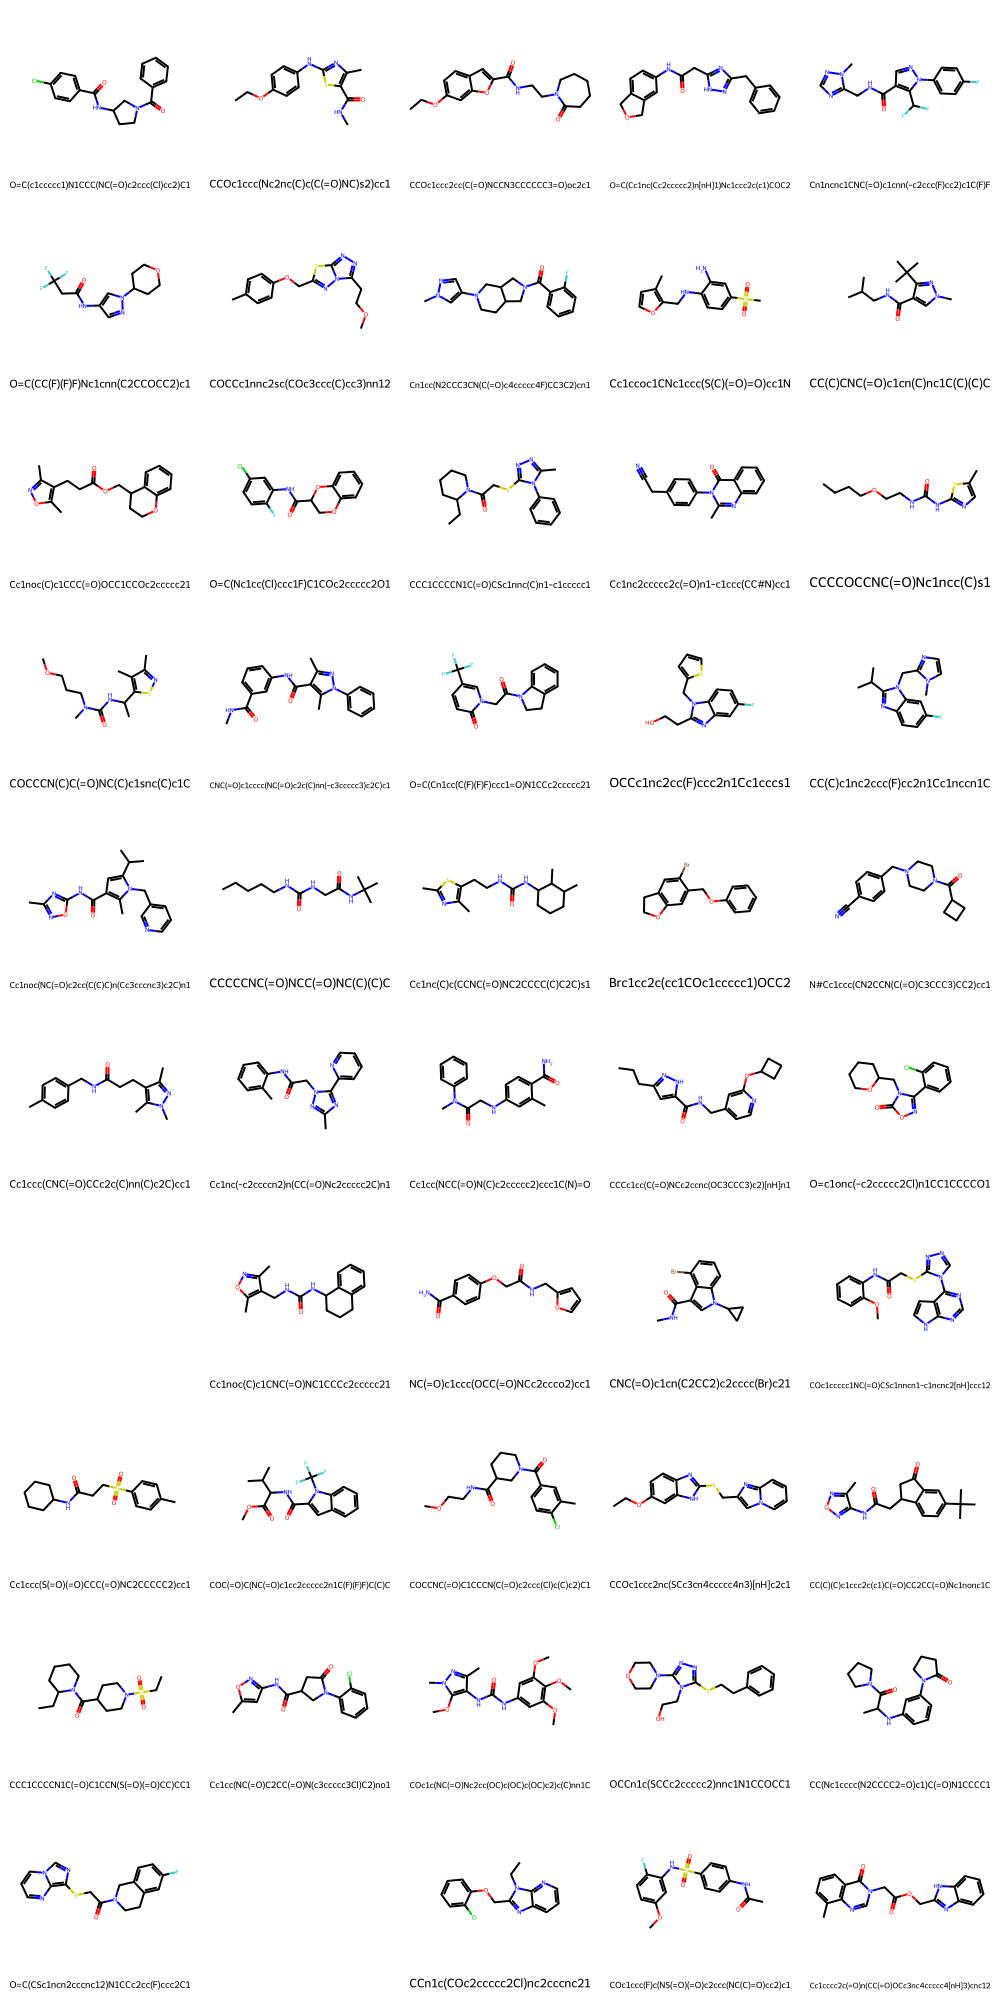

In [9]:
display(PandasTools.FrameToGridImage(smiles, column='ROMol', legendsCol='SMILES', molsPerRow=5))

In [10]:
smiles

SMILES  \
0           O=C(c1ccccc1)N1CCC(NC(=O)c2ccc(Cl)cc2)C1   
1                  CCOc1ccc(Nc2nc(C)c(C(=O)NC)s2)cc1   
2              CCOc1ccc2cc(C(=O)NCCN3CCCCCC3=O)oc2c1   
3        O=C(Cc1nc(Cc2ccccc2)n[nH]1)Nc1ccc2c(c1)COC2   
4          Cn1ncnc1CNC(=O)c1cnn(-c2ccc(F)cc2)c1C(F)F   
...                                              ...   
29995        CN(C)C(=O)c1cccc(NC(=O)COc2ccccc2C#N)c1   
29996                  COc1ccc(Cl)c2c1CCNC2c1cccnc1C   
29997            CC1(NC(=O)c2cc(F)ccc2Br)Cc2ccccc2C1   
29998        CC(c1ccco1)N(C)C(=O)c1cc(Cl)c2c(c1)OCO2   
29999  O=C(c1ccc(-c2cc[nH]n2)cc1)N1CCCN(c2ncccn2)CC1   

                                                   ROMol  
0      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
1      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
2      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
3      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
4      <rdkit.Chem.rdchem.Mol object at 0x000001F1ACA...  
...                                                  ...  
29995  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  
29996  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  
29997  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  
29998  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  
29999  <rdkit.Chem.rdchem.Mol object at 0x000001F1ACD...  

[30000 rows x 2 columns]

# Latent Space Visualization

## VAE model on ZINC dataset

In [2]:
import sys
sys.path.append("..")
import moses
from moses.vae import VAE
from moses.vae_property import VAEPROPERTY
from moses.utils import CharVocab, StringDataset
from moses.vae.trainer import VAETrainer
from moses.vae_property.trainer import VAEPROPERTYTrainer 

from moses.metrics import QED, SA, logP
from moses.utils import get_mol

In [3]:
def get_vae_model(folder_path, config_file, model_file):
    config = torch.load(f'{folder_path}{config_file}')

    train = moses.get_dataset('train', config)
    vocab = CharVocab.from_data(train)
    vocab.vectors = torch.eye(len(vocab.c2i))

    model_path = f'{folder_path}{model_file}'

    model = VAE(vocab, config)
    model.load_state_dict(torch.load(model_path))
    return train, config, model

    

def get_sample(train, prop, size=50000):
    '''
    [Input]
    train: 
    prop: list of properties to calculate. 'QED', 'logP', 'SA' are available.
    '''
    
    size = size
    np.random.seed(0)
    rand_indices = np.random.choice(train.shape[0], size, replace=False)
    sample = train[rand_indices]
    
    sample_mol = list(map(get_mol, sample))
    if 'QED' in prop:
        sample_qed = list(map(QED, sample_mol))
    else:
        sample_qed = None
    if 'logP' in prop:
        sample_logP = list(map(logP, sample_mol))
    else:
        sample_logP = None
    if 'SA' in prop:
        sample_sa = list(map(SA, sample_mol))
    else:
        sample_sa = None

    sample_prop = pd.DataFrame({'QED': sample_qed, 'logP': sample_logP, 'SA': sample_sa})
    return sample, sample_prop

def get_Z(config, model, sample):
    trainer = VAETrainer(config)
    sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

    Z = []

    for step, batch in enumerate(sample_loader):
        input_batch = tuple(data.to(model.device) for data in batch)
        z, _ = model.forward_encoder(input_batch)
        Z.extend(z.detach().cpu().numpy())

    Z = np.array(Z)

    return Z

In [ ]:
folder_path = '../../NewMoses_results/ZINC_vae_20240515/'
config_file = 'vae_config.pt'
model_file = 'vae_model_080.pt'

train, config, model = get_vae_model(folder_path, config_file, model_file)
sample, sample_prop = get_sample(train, ['QED', 'logP', 'SA'])
Z = get_Z(config, model, sample)

{'S', 'B', ')', 'O', 'n', 'c', '-', 'C', '2', '3', 'N', '5', '4', 'r', 'F', 's', ']', '1', '6', '=', '#', 'l', 'H', '(', '[', 'o'}


In [27]:
#config = torch.load('../checkpoints/ZINC_vae_done/vae_config.pt')
config = torch.load('../../NewMoses_results/ZINC_vae_20240515/vae_config.pt')

# vocab = torch.load('../checkpoints/ZINC_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

{'O', '6', '2', 's', 'S', '#', '3', 'c', 'B', '=', 'F', 'C', '1', 'l', '(', 'r', 'N', ')', 'o', 'H', 'n', '5', '4', '[', ']', '-'}


In [28]:
#model_path = '../checkpoints/ZINC_vae_done/vae_model_080.pt'
model_path = '../../NewMoses_results/ZINC_vae_20240515/vae_model_080.pt'

model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [29]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train.shape[0], size, replace=False)
sample = train[rand_indices]

In [6]:
sample_mol = list(map(get_mol, sample))
sample_qed = list(map(QED, sample_mol))
sample_logP = list(map(logP, sample_mol))
sample_sa = list(map(SA, sample_mol))

In [30]:
trainer = VAETrainer(config)
sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

In [31]:
for _, batch in enumerate(sample_loader):
    break

### 1. PCA of latent space

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [5]:
def plot_emb(Z_vis, prop, prop_type, dataset, type):
    df = pd.DataFrame(np.transpose((Z_vis[:,0],Z_vis[:,1])))
    df.columns = ['x','y']

    if len(prop_type) == 1:
        df['prop']=prop[prop_type[0]]

        plt.figure(figsize=(8, 6))
        plt.scatter(x=df['x'], y=df['y'], c=df['prop'],
                    cmap= 'viridis', marker='.',
                    s=10,alpha=0.5, edgecolors='none')
        plt.title(f'{type} of latent space colored by {prop_type} of dataset {dataset}')
        plt.colorbar()

        plt.tight_layout()
        plt.show()
        return 

    if len(prop_type) == 2:
        fig, axs = plt.subplots(1,2, figsize=(12, 5))
        
    elif len(prop_type) == 3:
        fig, axs = plt.subplots(1,3, figsize=(18, 5))

    for i in range(len(prop_type)):
        df[f'prop{i}'] = prop[prop_type[i]]
        scatter = axs[i].scatter(x=df['x'], y=df['y'], c=df[f'prop{i}'],
                                cmap= 'viridis', marker='.',
                                s=10,alpha=0.5, edgecolors='none')
        axs[i].set_title(f'{type} of latent space colored by {prop_type[i]} of dataset {dataset}')
        cbar = fig.colorbar(scatter, ax=axs[i])
        cbar.set_label(prop_type[i])

    plt.tight_layout()
    plt.show()


In [6]:
def calc_emb(Z, prop, prop_type, type=['PCA'], dataset='ZINC', plot=True, n_componenets=2):
    '''
    [Input]
    Z: latent space, numpy array of shape (n_samples, d_embedding)
    prop: property to color the latent space, dataframe of shape (n_samples, n_properties) with columns 'QED', 'logP', 'SA'
    prop_type: list containing the type of property to be colored. 'QED', 'logP', 'SA' are available.
    type: str, 'PCA' or 'TSNE'
    dataset: str, name of the dataset to be written in the title of the plot
    plot: bool, whether to plot the latent space or not
    n_components: int, number of components to reduce the latent space to
    '''
    # do pca and normalize
    if type == 'PCA':
        vis = PCA(n_components=2)
        Z_vis = vis.fit_transform(Z)
        Z_vis = MinMaxScaler().fit_transform(Z_vis)

        print(f'explained variance ratio: {vis.explained_variance_ratio_}')
    else:
        Z_vis = TSNE(n_components=2).fit_transform(Z)
        Z_vis = MinMaxScaler().fit_transform(Z_vis)

    if plot:
        plot_emb(Z_vis, prop, prop_type, dataset, type)

   
    return 

### ZINC VAE

explained variance ratio: [0.00824363 0.00823242]


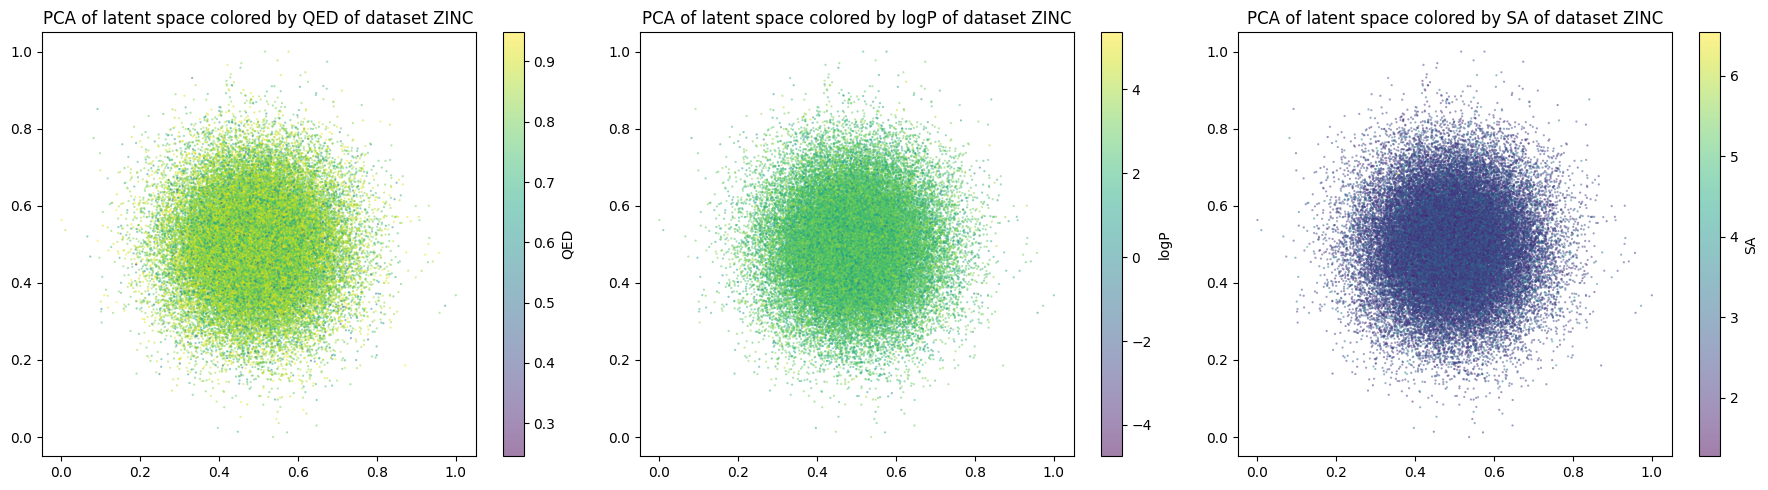

In [68]:
calc_emb(Z, sample_prop, prop_type=['QED', 'logP', 'SA'], type='PCA')

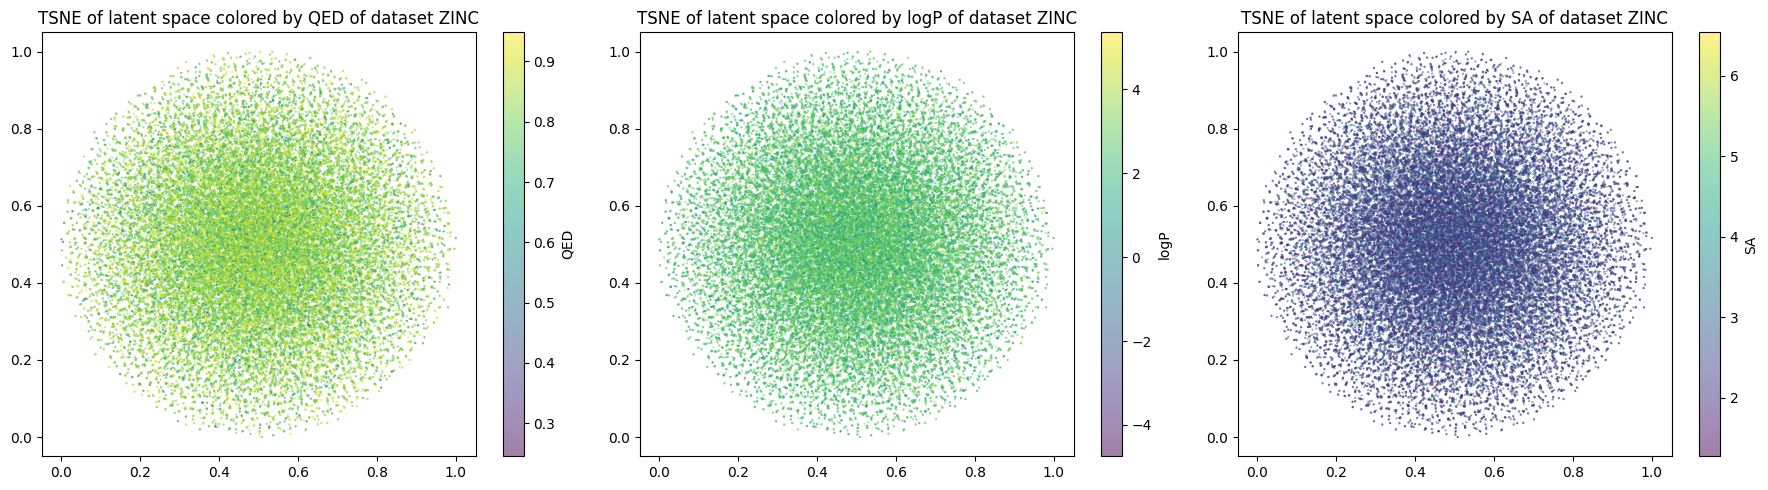

In [69]:
calc_emb(Z, sample_prop, prop_type=['QED', 'logP', 'SA'], type='TSNE')

### 2. T-SNE of latent space

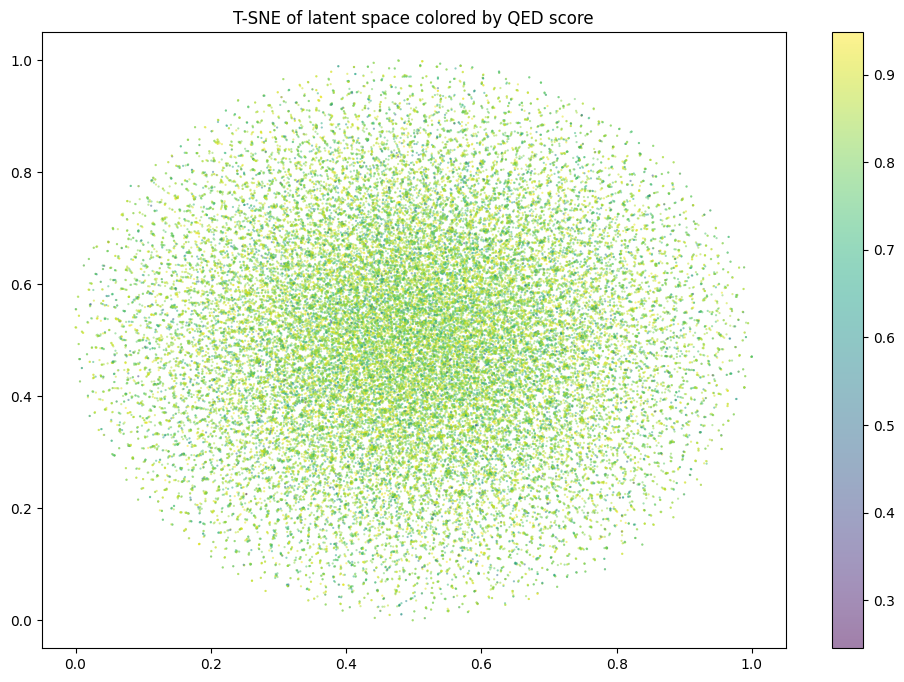

In [18]:
from sklearn.manifold import TSNE


Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

df = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('T-SNE of latent space colored by QED score')
plt.show()

## VAE model on QM9 dataset

In [ ]:
folder_path = '../../NewMoses_results/QM9_vae_20240515/'
config_file = 'vae_config.pt'
model_file = 'vae_model_080.pt'

train_qm9, config_qm9, model_qm9 = get_vae_model(folder_path, config_file, model_file)
sample_qm9, sample_prop_qm9 = get_sample(train_qm9, ['QED', 'logP', 'SA'])
Z_qm9 = get_Z(config, model, sample)

explained variance ratio: [0.0082723  0.00820822]


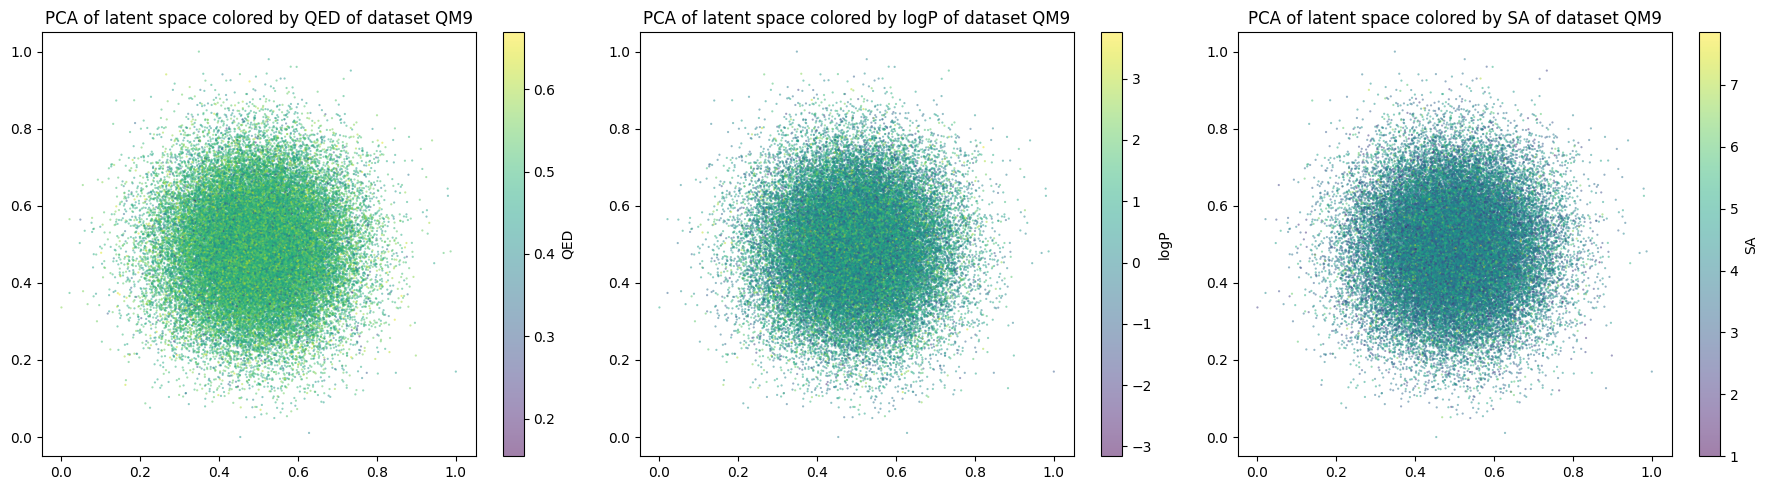

In [73]:
calc_emb(Z_qm9, sample_prop_qm9, prop_type=['QED', 'logP', 'SA'], type='PCA', dataset='QM9')

In [ ]:
calc_emb(Z_qm9, sample_prop_qm9, prop_type=['QED', 'logP', 'SA'], type='TSNE')

In [7]:
## SELFIES ZINC
folder_path = '../../NewMoses_results/ZINC_SELFIES_vae_20240522_135605/'
config_file = 'vae_config.pt'
model_file = 'vae_model_080.pt'

config_zinc_self = torch.load(f'{folder_path}{config_file}')

file_path = '../moses/dataset/data/ZINC/train.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:    
        file = 'train.csv'
        with zip_ref.open(file) as file:
            # Read the CSV file into a pandas DataFrame
            df= pd.read_csv(BytesIO(file.read()), header=0)
            train_zinc_self = df['SELFIES'].values

vocab_zinc_self = CharVocab.from_data(train_zinc_self)
vocab_zinc_self.vectors = torch.eye(len(vocab_zinc_self.c2i))

model_path = f'{folder_path}{model_file}'


{'B', 'n', 'F', 'i', '[', '#', 'a', 'N', 'P', 'l', 'S', 'r', ']', '=', 'c', 'R', 'h', 'C', 'H', 'O', '2', 'g', '1'}


In [ ]:
model_zinc_self = VAE(vocab_zinc_self, config_zinc_self)
model_zinc_self.load_state_dict(torch.load(model_path))

sample_zinc_self, sample_prop_zinc_self = get_sample(train_zinc_self, ['QED'])
Z_zinc_self = get_Z(config_zinc_self, model_zinc_self, sample_zinc_self)

In [ ]:
calc_emb(Z_zinc_self, sample_prop_zinc_self, prop_type=['QED', 'logP', 'SA'], type='PCA')

# SMILES PROP

In [7]:
folder_path = '../../NewMoses_results/ZINC_vae_property_20240522_051929/'
config_file = 'vae_property_config.pt'
model_file = 'vae_property_model_080.pt'
#config = torch.load('../checkpoints/ZINC_vae_done/vae_config.pt')
config_prp = torch.load(f'{folder_path}{config_file}')

In [8]:
file_path = '../moses/dataset/data/ZINC/train.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:    
        file = 'train.csv'
        with zip_ref.open(file) as file:
            # Read the CSV file into a pandas DataFrame
            df= pd.read_csv(BytesIO(file.read()), header=0)
            cols = ['logP', 'qed', 'SAS']
            cols.insert(0, 'SELFIES' if config_prp.use_selfies else 'SMILES')
            train_prp = df[cols].values


In [9]:
train_prp_vocab = df['SMILES'].values

In [10]:
vocab_prp = CharVocab.from_data(train_prp_vocab)
vocab_prp.vectors = torch.eye(len(vocab_prp.c2i))

{'6', '[', '(', 'N', 'F', '1', '-', '5', 'B', ']', 'c', 'O', 'r', 's', 'o', 'C', 'n', '3', 'H', '#', '4', 'S', 'l', '2', ')', '='}


In [11]:
#model_path = '../checkpoints/ZINC_vae_done/vae_model_080.pt'
model_path = f'{folder_path}{model_file}'

model_prp = VAEPROPERTY(vocab_prp, config_prp)
model_prp.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [12]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train_prp_vocab.shape[0], size, replace=False)
sample_prp = train_prp[rand_indices]

In [14]:
sample_mol_prp = list(map(get_mol, sample_prp[:,0]))
sample_qed_prp = list(map(QED, sample_mol_prp))
sample_logP_prp = list(map(logP, sample_mol_prp))
sample_sa_prp = list(map(SA, sample_mol_prp))
sample_prop_prp = pd.DataFrame({'QED': sample_qed_prp, 'logP': sample_logP_prp, 'SA': sample_sa_prp})

In [17]:
trainer_prp = VAEPROPERTYTrainer(config_prp)
sample_loader = trainer_prp.get_dataloader(model_prp, sample_prp, shuffle=False)

In [18]:
Z_prp = []

for step, batch in enumerate(sample_loader):
    input_batch = tuple(data.to(model_prp.device) for data in batch[0])
    z, _ = model_prp.forward_encoder(input_batch)
    Z_prp.extend(z.detach().cpu().numpy())
    
Z_prp = np.array(Z_prp)

explained variance ratio: [0.00830381 0.00828938]


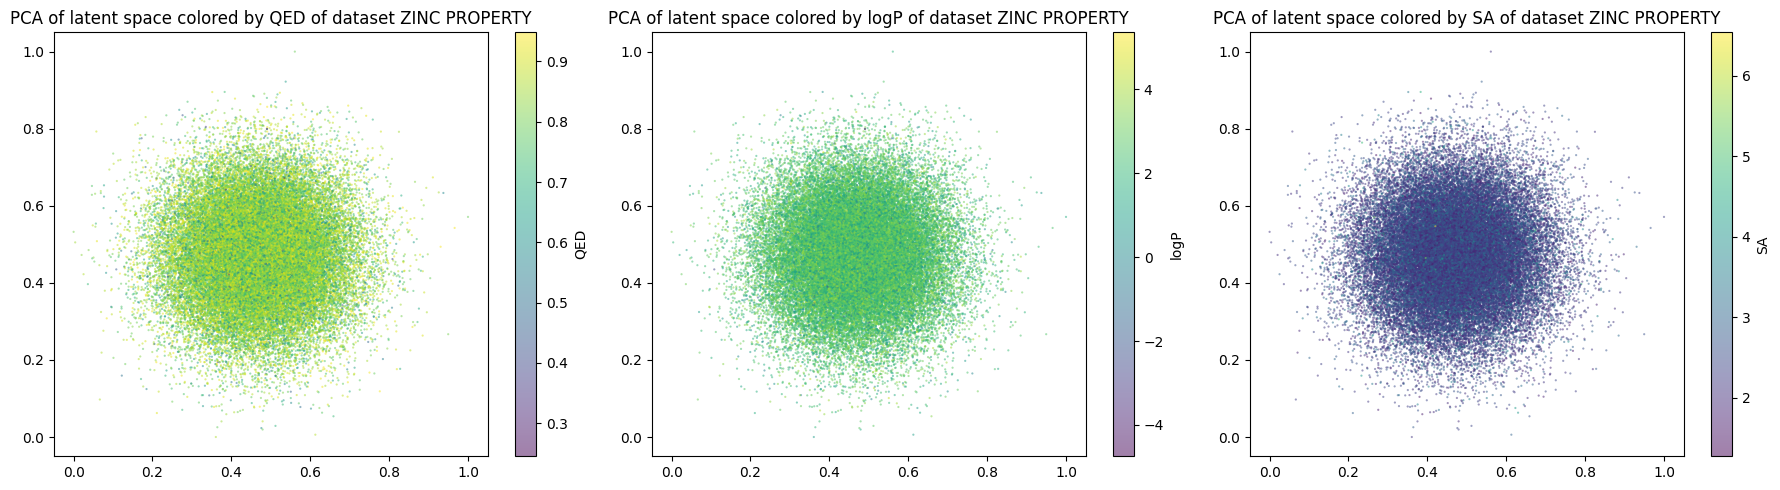

In [19]:
calc_emb(Z_prp, sample_prop_prp, prop_type=['QED', 'logP', 'SA'], type='PCA', dataset='ZINC PROPERTY')

# VAE vs. VAE_prop

In [ ]:
calc_emb(Z, sample_prop, prop_type=['QED', 'logP', 'SA'], type='PCA')
calc_emb(Z_zinc_prp, sample_prop_zinc_prp, prop_type=['QED', 'logP', 'SA'], type='PCA')

In [ ]:
config = torch.load('../checkpoints/QM9_vae_done/vae_config.pt')
# vocab = torch.load('../checkpoints/QM9_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

In [156]:
model_path = '../checkpoints/QM9_vae_done/vae_model_080.pt'
model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

* sample size = 50,000

In [157]:
size = 50000
np.random.seed(0)
rand_indices = np.random.choice(train.shape[0], size, replace=False)
sample = train[rand_indices]

In [160]:
sample_mol = list(map(get_mol, sample))
sample_qed = list(map(QED, sample_mol))

In [161]:
trainer = VAETrainer(config)
sample_loader = trainer.get_dataloader(model, sample, shuffle=False)

In [162]:
Z = []

for step, batch in enumerate(sample_loader):
    input_batch = tuple(data.to(model.device) for data in batch)
    z, _ = model.forward_encoder(input_batch)
    Z.extend(z.detach().cpu().numpy())
    
Z = np.array(Z)

### 1. PCA of latent space

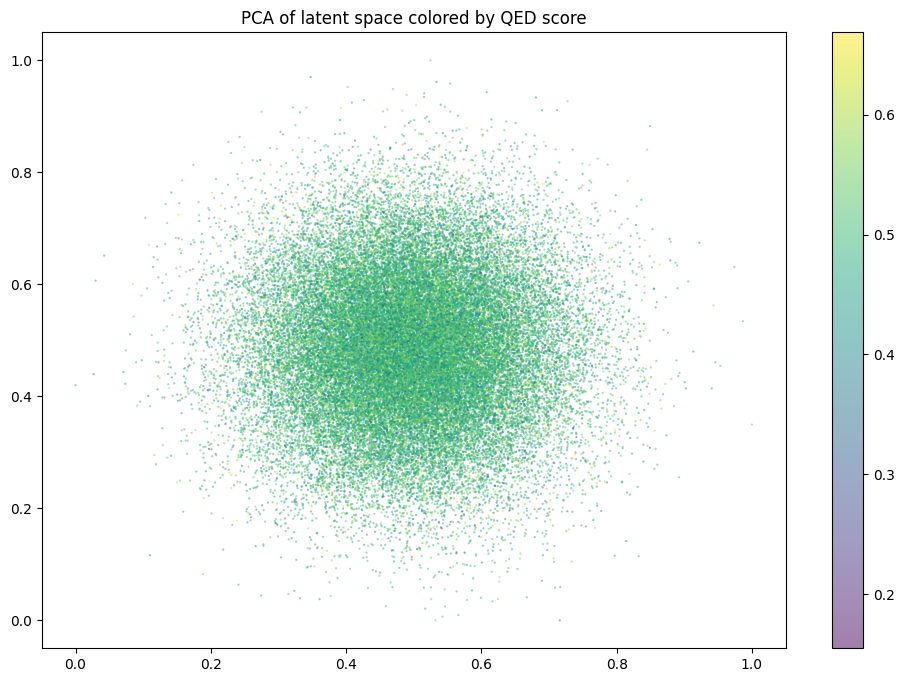

In [163]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('PCA of latent space colored by QED score')
plt.show()

### 2. T-SNE of latent space

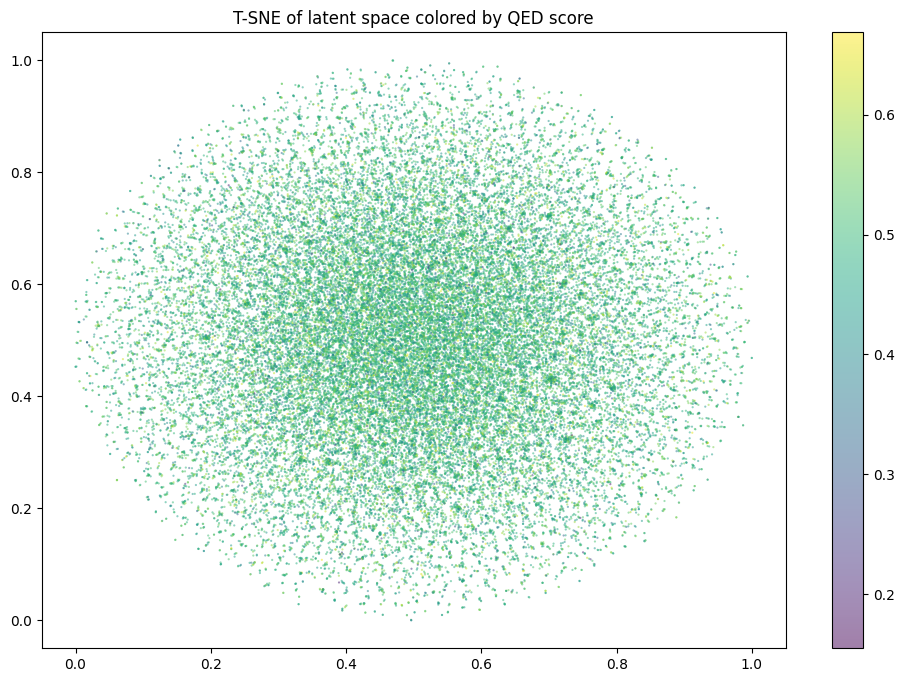

In [164]:
from sklearn.manifold import TSNE


Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

df = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df['qed']=sample_qed

plt.figure(figsize=(12,8))
plt.scatter(x=df['x'], y=df['y'], c=df['qed'],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.colorbar()
plt.title('T-SNE of latent space colored by QED score')
plt.show()

# print interpolated molecule structure

In [4]:
import moses
config = torch.load('../../NewMoses_results/ZINC_vae_20240515/vae_config.pt')

# vocab = torch.load('../checkpoints/ZINC_vae_done/vae_vocab.pt')

train = moses.get_dataset('train', config)
vocab = CharVocab.from_data(train)
vocab.vectors = torch.eye(len(vocab.c2i))

model_path = '../../NewMoses_results/ZINC_vae_20240515/vae_model_080.pt'

model = VAE(vocab, config)
model.load_state_dict(torch.load(model_path))

{'C', ')', '6', '5', 'S', 'n', 'B', 'o', 'F', 'H', '-', 'r', 'c', '[', ']', '4', '1', '#', 'N', '=', 'l', '(', '2', 'O', '3', 's'}


<All keys matched successfully>

In [5]:
traindata_path = '../moses/dataset/data/ZINC/train.csv'
train_molecule = pd.read_csv(traindata_path)
n = 100
selected_mol = train_molecule.sample(n=n)[['SMILES']]
#selected_gen['ROMol'] = selected_gen['SMILES'].apply(Chem.MolFromSmiles)
selected_mol = selected_mol.reset_index(drop=True)
selected_mol

SMILES
0         COC(=O)c1cccc(C(=O)NCc2ccccn2)n1
1            Cc1cc(NC(=O)NCCCN2CCOCC2)ccn1
2       COCCN(Cc1ccccc1)C(=O)c1ccc(F)cc1Cl
3      O=C1C2CCC(C2)N1Cc1cnn(-c2ccccc2F)c1
4     O=C(NC(C1CC1)C1CC1)c1cc(-c2ccco2)on1
..                                     ...
95     CC(NC(=O)CNC(N)=O)c1cc2cc(Cl)ccc2o1
96      CC(O)c1nc2ccccc2n1Cc1nnc(C2CCC2)o1
97        O=C(NCCc1ccccc1F)NCC(=O)N1CCCCC1
98   COC(=O)c1cccc(CCNC(=O)N(C)CC2CCOC2)c1
99  O=C(NC1CC1)c1nnn(-c2ccc(Br)cc2)c1C1CC1

[100 rows x 1 columns]

In [6]:
selected_smiles = np.array(selected_mol['SMILES'].tolist())


In [97]:
from torch.utils.data import DataLoader

selected_dataset = StringDataset(vocab, selected_smiles)
selected_dataloader = DataLoader(
    selected_dataset, batch_size=n,
    shuffle=True, collate_fn=selected_dataset.default_collate
)
for i, batch in enumerate(selected_dataloader):
    z, _ = model.forward_encoder(batch[0].T)
    if i == 0:
        Z = torch.empty((0, z.shape[1]))
    # do pca and normalize
    Z = torch.cat((Z, z), dim=0)
    
Z = Z.detach().numpy()
Z100 = Z*5

h: tensor([[-0.3526, -0.2336,  0.2484,  ..., -0.3282,  0.2277, -0.1408],
        [-0.3759, -0.2264,  0.2977,  ..., -0.3537,  0.2454, -0.1632],
        [-0.3438, -0.2101,  0.1755,  ..., -0.3560,  0.2433, -0.1623],
        ...,
        [-0.3807, -0.2021,  0.1526,  ..., -0.3317,  0.2289, -0.1936],
        [-0.3875, -0.2037,  0.2058,  ..., -0.3458,  0.2465, -0.1898],
        [-0.3826, -0.2022,  0.1016,  ..., -0.3217,  0.2244, -0.1976]],
       grad_fn=<SqueezeBackward1>)
eps: tensor([[ 1.2064e+00,  4.1093e-02, -1.1523e-02,  ...,  1.3214e+00,
         -1.8416e-01,  3.7180e-01],
        [ 7.6542e-01,  1.3527e+00,  8.7727e-01,  ..., -1.0785e-01,
          6.4565e-01, -6.0804e-01],
        [ 6.8103e-01,  9.8111e-01,  1.7216e-01,  ..., -9.3984e-01,
          1.2903e+00, -4.6496e-01],
        ...,
        [ 1.2075e-01,  4.3664e-01,  6.8955e-01,  ...,  1.3935e-01,
         -6.8047e-01,  7.1290e-01],
        [ 4.4799e-01, -1.2029e-01, -9.4472e-01,  ..., -1.1982e+00,
         -1.1164e+00, -1.2678e-

In [7]:
def lin_interp(x,y,t):
    '''
    x: starting point
    y: ending point
    t: interpolation parameter
    '''
    return t*y + (1-t)*x

In [8]:
def slerp(low, high, val):
    '''
    low: starting point
    high: ending point
    val: interpolation parameter between 0 and 1
    '''
    omega = np.arccos(np.dot(low/np.linalg.norm(low), high/np.linalg.norm(high)))
    so = np.sin(omega)
    return np.sin((1.0-val)*omega) / so * low + np.sin(val*omega)/so * high

In [42]:
def print_interp(start, end, n, type='slerp', test=True):
    '''
    i: index of the first molecule
    j: index of the second molecule
    n: number of interpolation points
    type: interpolation type, either 'slerp' or 'linear'
    '''
    start = start
    end = end
    t_vals = np.linspace(0, 1, n)
    if type == 'slerp':
        interps = [slerp(start, end, t) for t in t_vals]
    else:
        interps = [lin_interp(start, end, t) for t in t_vals]
    interps = np.array(interps)
    interps_torch = torch.from_numpy(interps)
    interps_torch = torch.tensor(interps_torch, dtype=torch.float32)

    model.eval()
    print(interps_torch.shape)
    #sampled, new_x = model.sample(n, z=torch.from_numpy(np.zeros((8, 128), dtype=np.float32)), test=True) 
    sampled = model.sample(n, z=interps_torch, temp=0.1, test=test)

    sampled_df = pd.DataFrame(sampled, columns=['SMILES'])
    sampled_df['Romol'] = sampled_df['SMILES'].apply(Chem.MolFromSmiles)
    display(PandasTools.FrameToGridImage(sampled_df, column='Romol', legendsCol='SMILES', molsPerRow=4))
    print(f'sample length: {len(sampled_df)}')

    return interps

In [76]:
a = torch.multinomial(torch.from_numpy(np.array([[0.1, 0.5, 4, 0.4], [0.4, 2, 1, 3]])), 1)
a

tensor([[2],
        [1]])

In [77]:
sampled, new_x = model.sample(1, z=torch.from_numpy(np.zeros((1, 128), dtype=np.float32)))
sampled, new_x

(['CC(C)Oc1ccc(NC(=O)Cc2cn3ccccc3n2)cc1'],
 [tensor([26, 12, 12,  1, 12,  2, 16, 20,  4, 20, 20, 20,  1, 15, 12,  1, 10, 16,
           2, 12, 20,  5, 20, 22,  6, 20, 20, 20, 20, 20,  6, 22,  5,  2, 20, 20,
           4, 27])])

In [78]:
model.eval()
sampled, new_x = model.sample(1, z=torch.from_numpy(np.zeros((1, 128), dtype=np.float32)))
sampled, new_x

(['O=C(CSc1nc(=O)[nH]c2c1CCC2)NCc1ccc(F)cc1'],
 [tensor([26, 16, 10, 12,  1, 12, 17, 20,  4, 22, 20,  1, 10, 16,  2, 18, 22, 14,
          19, 20,  5, 20,  4, 12, 12, 12,  5,  2, 15, 12, 20,  4, 20, 20, 20,  1,
          13,  2, 20, 20,  4, 27])])

tensor([[ 5.8456,  0.4714, -0.2990,  ...,  6.4392, -1.0963,  1.7346],
        [ 5.1925,  0.0703,  0.3220,  ...,  6.3887, -1.4773,  2.0557],
        [ 4.2768, -0.3342,  0.9267,  ...,  6.0150, -1.7836,  2.2728],
        ...,
        [ 0.4688, -1.3699,  2.3505,  ...,  3.2194, -2.1225,  2.2199],
        [-0.9398, -1.5975,  2.6148,  ...,  1.8867, -2.0231,  1.9704],
        [-2.3009, -1.7443,  2.7469,  ...,  0.4585, -1.8214,  1.6213]])


[15:19:47] SMILES Parse Error: syntax error while parsing: -n1c(C2CCCCC2)nc2cc(C(F)(F)F)ccc21
[15:19:47] SMILES Parse Error: Failed parsing SMILES '-n1c(C2CCCCC2)nc2cc(C(F)(F)F)ccc21' for input: '-n1c(C2CCCCC2)nc2cc(C(F)(F)F)ccc21'


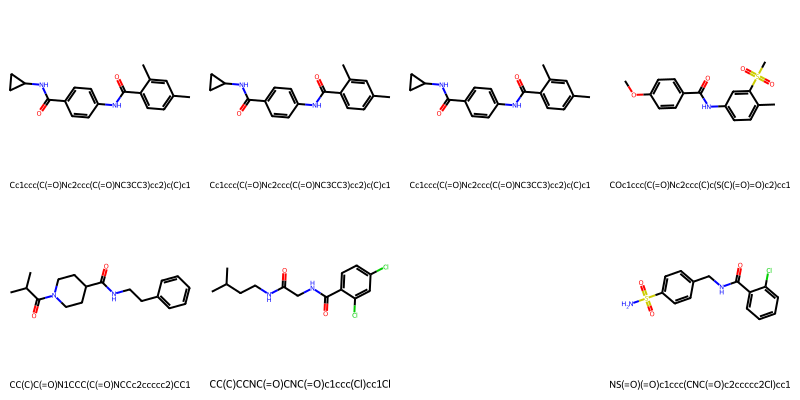

sample length: 8
tensor([[ 5.8456,  0.4714, -0.2990,  ...,  6.4392, -1.0963,  1.7346],
        [ 4.6818,  0.1548,  0.1361,  ...,  5.5848, -1.1999,  1.7184],
        [ 3.5181, -0.1617,  0.5713,  ...,  4.7304, -1.3034,  1.7022],
        ...,
        [ 0.0267, -1.1112,  1.8766,  ...,  2.1673, -1.6142,  1.6536],
        [-1.1371, -1.4278,  2.3118,  ...,  1.3129, -1.7178,  1.6375],
        [-2.3009, -1.7443,  2.7469,  ...,  0.4585, -1.8214,  1.6213]])


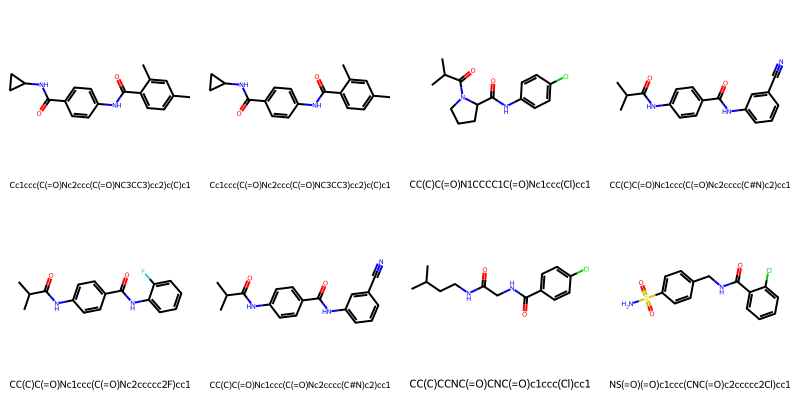

sample length: 8


In [99]:
slerp_emb, slerp_x = print_interp(0, 99, 8, type='slerp')
slerp_emb, slerp_x = print_interp(0, 99, 8, type='linear')

tensor([[-1.6447,  1.3870, -0.5302,  ...,  1.1777, -0.1190,  0.2396],
        [-1.1838,  1.1389, -0.4570,  ...,  0.9609, -0.2048,  0.1431],
        [-0.6501,  0.8207, -0.3558,  ...,  0.6850, -0.2780,  0.0378],
        ...,
        [ 1.0496, -0.3442,  0.0481,  ..., -0.3159, -0.3826, -0.2658],
        [ 1.5325, -0.7229,  0.1884,  ..., -0.6387, -0.3718, -0.3422],
        [ 1.9212, -1.0571,  0.3172,  ..., -0.9222, -0.3383, -0.3974]])


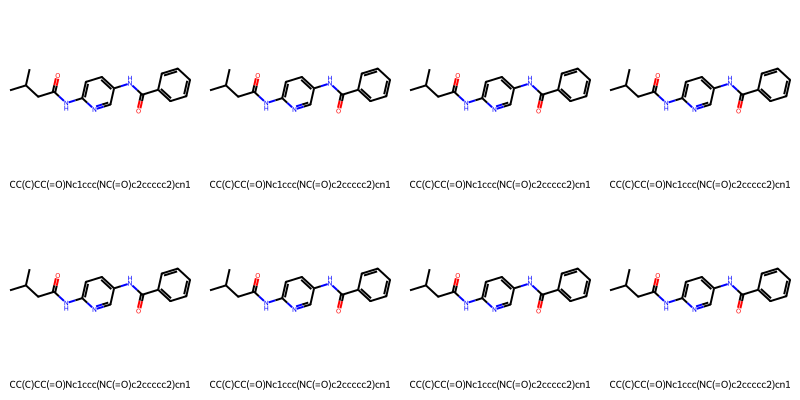

sample length: 8
tensor([[-1.6447,  1.3870, -0.5302,  ...,  1.1777, -0.1190,  0.2396],
        [-1.1838,  1.1389, -0.4570,  ...,  0.9609, -0.2048,  0.1431],
        [-0.6501,  0.8207, -0.3558,  ...,  0.6850, -0.2780,  0.0378],
        ...,
        [ 1.0496, -0.3442,  0.0481,  ..., -0.3159, -0.3826, -0.2658],
        [ 1.5325, -0.7229,  0.1884,  ..., -0.6387, -0.3718, -0.3422],
        [ 1.9212, -1.0571,  0.3172,  ..., -0.9222, -0.3383, -0.3974]])


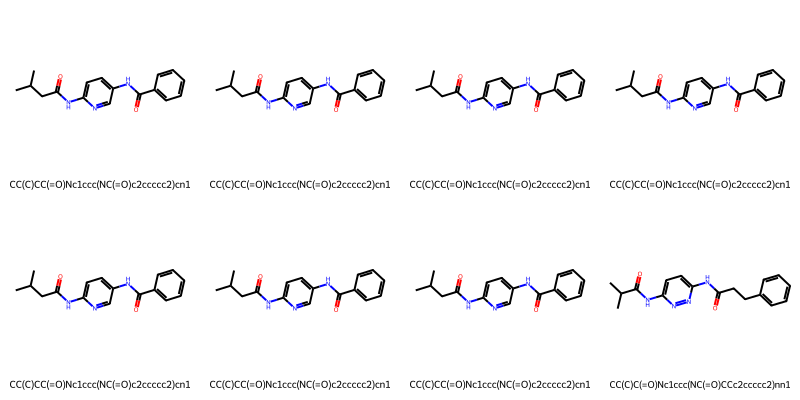

sample length: 8


In [84]:
slerp_emb, slerp_x = print_interp(0, 99, 8, type='slerp')
slerp_emb, slerp_x = print_interp(0, 99, 8, type='slerp', test=False)


tensor([[-1.6447,  1.3870, -0.5302,  ...,  1.1777, -0.1190,  0.2396],
        [-1.1838,  1.1389, -0.4570,  ...,  0.9609, -0.2048,  0.1431],
        [-0.6501,  0.8207, -0.3558,  ...,  0.6850, -0.2780,  0.0378],
        ...,
        [ 1.0496, -0.3442,  0.0481,  ..., -0.3159, -0.3826, -0.2658],
        [ 1.5325, -0.7229,  0.1884,  ..., -0.6387, -0.3718, -0.3422],
        [ 1.9212, -1.0571,  0.3172,  ..., -0.9222, -0.3383, -0.3974]])


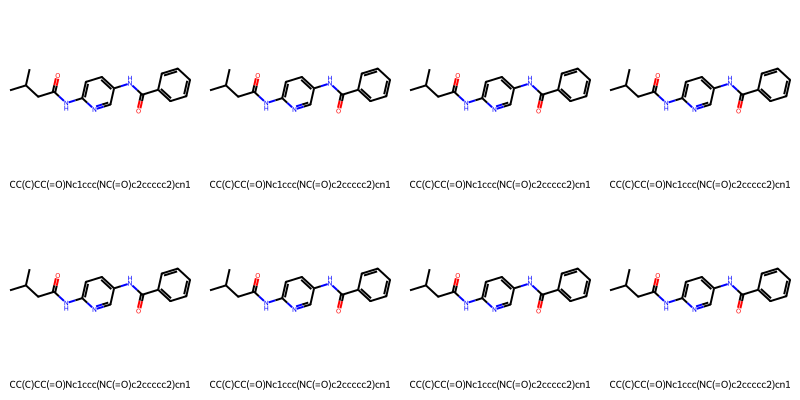

sample length: 8


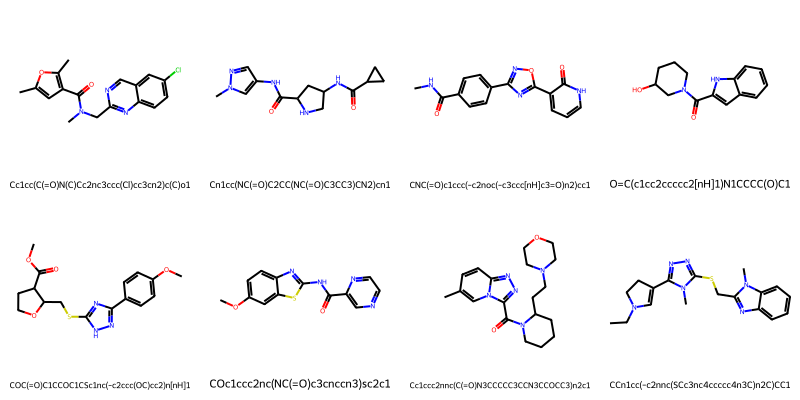

sample length: 8


(array([[-0.63162726, -0.54556465, -1.4146881 , ..., -1.29821   ,
         -0.9678333 , -0.7200675 ],
        [-0.39683115, -0.5136705 , -1.3250024 , ..., -1.1049378 ,
         -1.051708  , -0.84068596],
        [-0.16203502, -0.48177636, -1.2353168 , ..., -0.9116655 ,
         -1.1355828 , -0.9613044 ],
        ...,
        [ 0.5423534 , -0.38609385, -0.9662596 , ..., -0.3318487 ,
         -1.387207  , -1.3231597 ],
        [ 0.77714944, -0.35419968, -0.8765739 , ..., -0.13857642,
         -1.4710817 , -1.443778  ],
        [ 1.0119456 , -0.3223055 , -0.7868882 , ...,  0.05469585,
         -1.5549564 , -1.5643965 ]], dtype=float32),
 [tensor([26, 12, 20,  4, 20, 20,  1, 12,  1, 10, 16,  2, 15,  1, 12,  2, 12, 20,
           5, 22, 20,  6, 20, 20, 20,  1, 12, 21,  2, 20, 20,  6, 20, 22,  5,  2,
          20,  1, 12,  2, 23,  4, 27]),
  tensor([26, 12, 22,  4, 20, 20,  1, 15, 12,  1, 10, 16,  2, 12,  5, 12, 12,  1,
          15, 12,  1, 10, 16,  2, 12,  6, 12, 12,  6,  2, 12, 15,  5,  2

In [12]:
lin_emb = print_interp(2, 6, 8, 'linear')
lin_emb

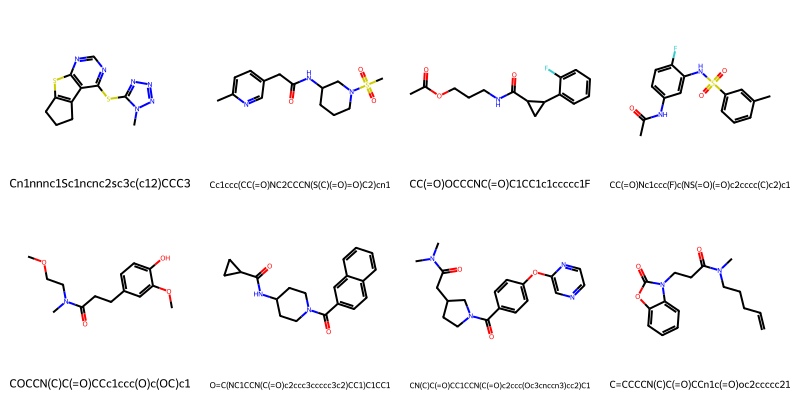

In [19]:
print_interp(10, 51, 8)

## Interpolation by PCA inverse

In [ ]:
def lin_interp(x,y,t):
    '''
    x: starting point
    y: ending point
    t: interpolation parameter
    '''
    return t*y + (1-t)*x

In [ ]:
def slerp(low, high, val):
    '''
    low: starting point
    high: ending point
    val: interpolation parameter between 0 and 1
    '''
    omega = np.arccos(np.dot(low/np.linalg.norm(low), high/np.linalg.norm(high)))
    so = np.sin(omega)
    return np.sin((1.0-val)*omega) / so * low + np.sin(val*omega)/so * high

In [ ]:
def print_interp(start, end, n, type='slerp', test=True):
    '''
    i: index of the first molecule
    j: index of the second molecule
    n: number of interpolation points
    type: interpolation type, either 'slerp' or 'linear'
    '''
    start = start
    end = end
    t_vals = np.linspace(0, 1, n)
    if type == 'slerp':
        interps = [slerp(start, end, t) for t in t_vals]
    else:
        interps = [lin_interp(start, end, t) for t in t_vals]
    interps = np.array(interps)
    interps_torch = torch.from_numpy(interps)
    interps_torch = torch.tensor(interps_torch, dtype=torch.float32)

    model.eval()
    print(interps_torch.shape)
    #sampled, new_x = model.sample(n, z=torch.from_numpy(np.zeros((8, 128), dtype=np.float32)), test=True) 
    sampled = model.sample(n, z=interps_torch, temp=0.1, test=test)

    sampled_df = pd.DataFrame(sampled, columns=['SMILES'])
    sampled_df['Romol'] = sampled_df['SMILES'].apply(Chem.MolFromSmiles)
    display(PandasTools.FrameToGridImage(sampled_df, column='Romol', legendsCol='SMILES', molsPerRow=4))
    print(f'sample length: {len(sampled_df)}')

    return interps

In [10]:
folder_path = '../../NewMoses_results/ZINC_vae_20240515/'
config_file = 'vae_config.pt'
model_file = 'vae_model_080.pt'

train, config, model = get_vae_model(folder_path, config_file, model_file)
sample, sample_prop = get_sample(train, ['QED'])
Z = get_Z(config, model, sample)

{'2', '4', 'r', '6', 'O', ')', 'B', ']', 'S', 'F', 'o', 'H', 'l', '=', '#', 'c', 'n', 'N', '3', 's', '-', '1', '[', '5', '(', 'C'}


In [ ]:
model.eval()

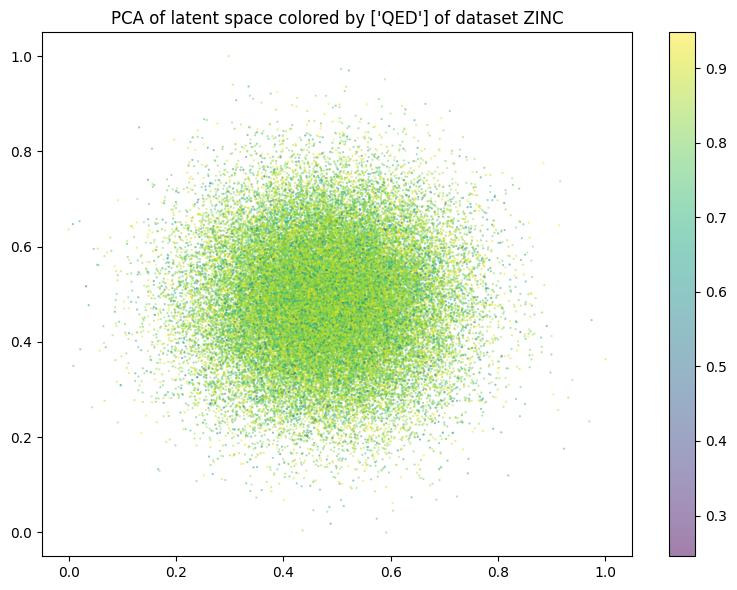

In [12]:
pca = PCA(n_components=2)
pca_Z = pca.fit_transform(Z)
scaler = MinMaxScaler()
scaled_Z = scaler.fit_transform(pca_Z)

plot_emb(scaled_Z, sample_prop, ['QED'], 'ZINC', 'PCA')

In [35]:
sample_point = np.array([[0.0, 0.5],[1.0, 0.65]] )


In [ ]:
undo_scale = scaler.inverse_transform(sample_point)
recon_sample = pca.inverse_transform(undo_scale)

torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_20724\959784107.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


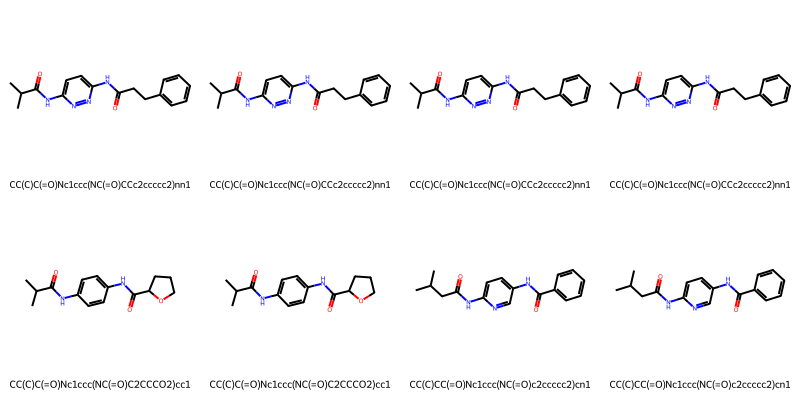

sample length: 8
torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_20724\959784107.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


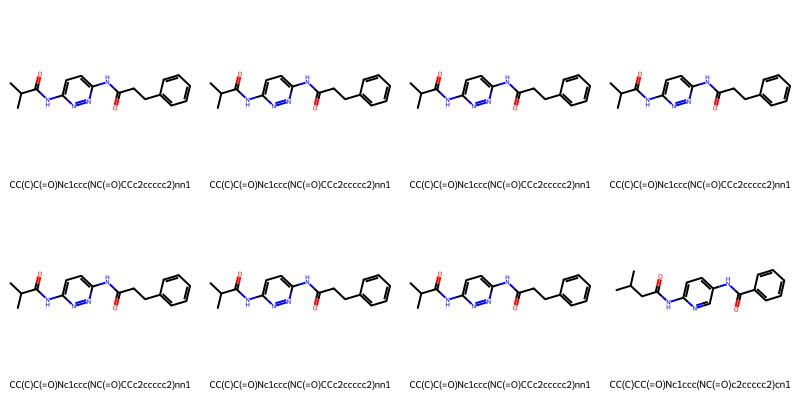

sample length: 8
torch.Size([8, 128])


C:\Users\lisa0\AppData\Local\Temp\ipykernel_20724\959784107.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  interps_torch = torch.tensor(interps_torch, dtype=torch.float32)


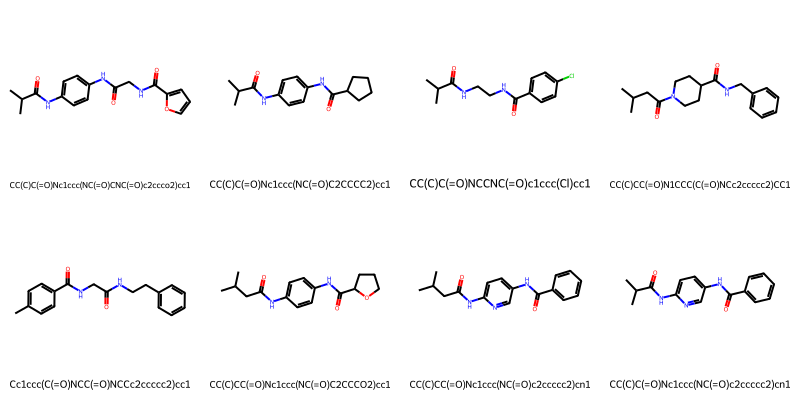

sample length: 8


In [44]:
slerp_emb = print_interp(recon_sample[0], recon_sample[1], 8, type='slerp', test=True)
slerp_emb = print_interp(recon_sample[0], recon_sample[1], 8, type='linear', test=True)

slerp_emb = print_interp(recon_sample[0], recon_sample[1], 8, type='slerp', test=False)
